# Load pacakages
For our exercises, you should always use the standar packages from Google Colab unless stated otherwise.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)
print(np.__version__)
print(pd.__version__)

1.13.1
1.16.3
0.24.2


# Load data function
Here you must write down your data loading function

In [0]:
def loadTrainData (default_dir="/default/path/if/needed"):
  x = np.random.rand(16000,1) # write our data loading procedures
  y = np.sin(x)
  return x , y

def loadTestData (default_dir="/default/path/if/needed"):
  x = np.random.rand(160,1) # write our data loading procedures
  y = np.sin(x)
  return x , y

# Structure your model
Create a class to define and use your model

In [0]:
class Model:
  """
  Tensor Flow fully connected network model. 
  `Model(learning_rate=0.0001, mini_batches=16, neurons=[4])`
  Parameters
  
  learning_rate : the learning rate parameter for the optimization method
  mini_batches : Number of elements in every batch for the learning phase
  layers : list of integers representing the number of neurons on every layer
  """
  def __init__(self,learning_rate=0.0001, mini_batches=16, layers=[4]):
    self.lr = learning_rate
    self.mb = mini_batches
    
    # Input and labels can only be float32
    self.input = tf.placeholder(tf.float32, shape=(None, 1), name="X")
    self.label = tf.placeholder(tf.float32, shape=(None, 1), name="Y")
    
    # Initialization of model
    self.output = self.input
    for neurons in layers:
      self.output = tf.layers.dense(self.output, neurons)
      
    self.output = tf.layers.dense(self.output, 1) # last dense layer
    
    # Definition of the loss
    self.loss = (self.output - self.label) * (self.output - self.label)
    self.loss = tf.reduce_mean(self.loss)
    
  def get_loss(self):
    """loss getter method"""
    return self.loss
  
  def get_xy(self):
    """input and label getter"""
    return self.input, self.label
  
  def get_output(self):
    """output getter"""
    return self.output

# Create an optimization routine
Define your optimization steps

In [0]:
class Optimizer:
  """
  Learning algorithm for a TensorFlow model
  `Optimizer(model)`
  model : a fully connected TensorFlow neural network
  """
  def __init__(self,model):
    self.model     = model
    self.loss      = model.get_loss()
    self.X, self.Y = model.get_xy()
    self.mb        = model.mb # Mini batches
    self.output    = model.get_output()
    
    # Using GD as optimizier algorithm
    self.opt       = tf.train.GradientDescentOptimizer(learning_rate = model.lr)
    self.optAction = self.opt.minimize(self.loss) # minimize loss
    
  def batching (self, size):
    """Return the indexes of the input to be used for minibatch"""
    r=np.arange(int(size))
    np.random.shuffle(r)
    return r
  
  def train (self, dataX, dataY, verbose):
    """Training of the NN"""
    i     = 0 # A counter for the number of data processed
    loss  = 0 
    count = 0 # Another counter, for the number of minibatches required
    batchOrder = self.batching(len(dataX)) # Get indexes of batch data
#     print (batchOrder)
    while (i+self.mb <= len(dataX)): # for all elements in the input 
      
      # get the batch data
      mbX, mbY   = dataX[batchOrder[i:i+self.mb]] , dataY[batchOrder[i:i+self.mb]]
      
      # run optimization
      _ , mbLoss = self.sess.run([self.optAction, self.loss],
                                   feed_dict={
                                       self.X:mbX,
                                       self.Y:mbY
                                   })
      if verbose>1:
        print("\t Inner loss: "+str(mbLoss))
          
      loss  += mbLoss
      i     += self.mb
      count += 1
    loss = loss / count
    return loss
  
  def test  (self, dataX, dataY, verbose):
    i     = 0 # A counter for the number of data processed
    loss  = 0
    count = 0 # Another counter, for the number of minibatches required
    batchOrder = self.batching(len(dataX)) # Get indexes of batch data
    
    while (i+self.mb <= len(dataX)): # for all elements in the input 
      
      # get test data for the batch  
      mbX, mbY   = dataX[i:i+self.mb] , dataY[i:i+self.mb]
      
      # get the loss on the test set
      mbLoss = self.sess.run(self.loss,
                                   feed_dict={
                                       self.X:mbX,
                                       self.Y:mbY
                                   })          
      loss  += mbLoss
      i     += self.mb
      count += 1
    loss = loss / count
    return loss
  
  def run   (self, dataX, dataY, testX, testY, epochs, verbose=2):
    """Run the learning phase and return the test and train history"""
    historyTR = []
    historyTS = []
    with tf.Session() as self.sess:
      self.sess.run(tf.global_variables_initializer())
      lossTS = self.test  (testX , testY, verbose)
      historyTR.append(lossTS)
      historyTS.append(lossTS)
      for i in range(epochs):
        
        lossTR = self.train (dataX , dataY, verbose)
        lossTS = self.test  (testX , testY, verbose)
        if verbose > 0:
          print("Epoch " +str(i+1)+" : Train Loss = " + str(lossTR)+" :  Test Loss = " + str(lossTS))
        historyTR.append(lossTR)
        historyTS.append(lossTS)
    return historyTR, historyTS

# Structure your calls
Here you should make the main calls

In [5]:
x  , y  = loadTrainData ()
xt , yt = loadTestData  ()

model  = Model ()
opt    = Optimizer (model)
tr, ts = opt.run (x, y, xt, yt, 100, verbose=1)


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1 : Train Loss = 0.5414423816427588 :  Test Loss = 0.24959914684295653
Epoch 2 : Train Loss = 0.1821133549772203 :  Test Loss = 0.12759405076503755
Epoch 3 : Train Loss = 0.12405825949832797 :  Test Loss = 0.10099260732531548
Epoch 4 : Train Loss = 0.10607108416780829 :  Test Loss = 0.08845331221818924
Epoch 5 : Train Loss = 0.09441171769797801 :  Test Loss = 0.07891470901668071
Epoch 6 : Train Loss = 0.08459535798616707 :  Test Loss = 0.07068615704774857
Epoch 7 : Train Loss = 0.07591087008826435 :  Test Loss = 0.06339624635875225
Epoch 8 : Train Loss = 0.06815817696601152 :  Test Loss = 0.05690982900559902
Epoch 9 : Train Loss = 0.06122243491001427 :  Test Loss = 0.05109430253505707
Epoch 10 : Train Loss = 0.0550064846072346 :  Test Loss = 0.0458856163546443
Epoch 11 : Train Loss = 0.04943234550766647 :  Test Loss = 0.04121451303362846
Epoch 12 : Tr

# PLOT

3.0.3


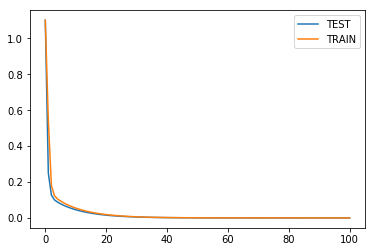

In [6]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(ts, label='TEST')
plt.plot(tr, label='TRAIN')
plt.legend()
plt.show()

# EXERCISE 0
## Your goal is to:
### Expand this model to receive multiple inputs and the output must be of size 2.
Your network must receive 5 different numbers, and output the sumation of cossines of the numbers and the summation of the sines.

### Add L2 and L1 regularizations directly on the loss function and include their coeficcients as hyper-parameters

### Add comments to this code

## Feel free to make changes, as long as they make the code clear and keep a similar structure

# Creating the data

As described, the input will be five numbers

In [0]:
def loadTrainData():
  x = np.random.rand(16000,5)
  y = np.vstack([np.sum(np.sin(x),axis=1), np.sum(np.cos(x),axis=1)]).transpose()
  return x , y

def loadTestData():
  x = np.random.rand(160,5)
  y = np.vstack([np.sum(np.sin(x),axis=1), np.sum(np.cos(x),axis=1)]).transpose()
  return x , y

# Creating the model class
Sine the input and output have changed, the model must be modified. The input is modified to accept 5 element arrays, and the output is now 2 elements.
The regularization is added to the dense layers, since the regularization must be aplied to the weights, and the "dense" layer does not allow for the graph to get acces to the weights. Thus, the contrib regularizations have been used.

In [0]:
class Model:
  """
  Tensor Flow fully connected network model. 
  `Model(learning_rate=0.0001, mini_batches=16, neurons=[4], reg_type="L2", reg=0.01)`
  Parameters
  
  learning_rate : the learning rate parameter for the optimization method
  mini_batches : Number of elements in every batch for the learning phase
  layers : list of integers representing the number of neurons on every layer
  reg : list of regularization coeficients for L1 and L2
  """
  def __init__(self,learning_rate=0.0001,
               mini_batches=16,
               layers=[4,4],
               reg_type="L2",
               reg=0.01):
    
    self.lr = learning_rate
    self.mb = mini_batches
    
    # Input and labels can only be float32
    self.input = tf.placeholder(tf.float32, shape=(None, 5), name="X")
    self.label = tf.placeholder(tf.float32, shape=(None, 2), name="Y")
    
    # Setup regularizer
    if reg_type in ["L1","l1"]:
      regularizer = tf.contrib.layers.l1_regularizer(reg)
    else:
      regularizer = tf.contrib.layers.l2_regularizer(reg)
    
    # Initialization of model
    self.output = self.input
    for neurons in layers:
      self.output = tf.layers.dense(self.output, 
                                    neurons, 
                                    kernel_regularizer=regularizer)
      
    self.output = tf.layers.dense(self.output, 2) # last dense layer
    
    # Definition of the loss
    self.loss = (self.output - self.label) * (self.output - self.label)
    self.loss = tf.reduce_mean(self.loss)
    
  def get_loss(self):
    """loss getter method"""
    return self.loss
  
  def get_xy(self):
    """input and label getter"""
    return self.input, self.label
  
  def get_output(self):
    """output getter"""
    return self.output

In [0]:
class Optimizer:
  """
  Learning algorithm for a TensorFlow model
  `Optimizer(model)`
  model : a fully connected TensorFlow neural network
  """
  def __init__(self,model):
    self.model     = model
    self.loss      = model.get_loss()
    self.X, self.Y = model.get_xy()
    self.mb        = model.mb # Mini batches
    self.output    = model.get_output()
    
    # Using GD as optimizier algorithm
    self.opt       = tf.train.GradientDescentOptimizer(learning_rate = model.lr)
    self.optAction = self.opt.minimize(self.loss) # minimize loss
    
  def batching (self, size):
    """Return the indexes of the input to be used for minibatch"""
    r=np.arange(int(size))
    np.random.shuffle(r)
    return r
  
  def train (self, dataX, dataY, verbose):
    """Training of the NN"""
    i     = 0 # A counter for the number of data processed
    loss  = 0 
    count = 0 # Another counter, for the number of minibatches required
    batchOrder = self.batching(len(dataX)) # Get indexes of batch data
#     print (batchOrder)
    while (i+self.mb <= len(dataX)): # for all elements in the input 
      
      # get the batch data
      mbX, mbY   = dataX[batchOrder[i:i+self.mb]] , dataY[batchOrder[i:i+self.mb]]
      
      # run optimization
      _ , mbLoss = self.sess.run([self.optAction, self.loss],
                                   feed_dict={
                                       self.X:mbX,
                                       self.Y:mbY
                                   })
      if verbose>1:
        print("\t Inner loss: "+str(mbLoss))
          
      loss  += mbLoss
      i     += self.mb
      count += 1
    loss = loss / count
    return loss
  
  def test  (self, dataX, dataY, verbose):
    i     = 0 # A counter for the number of data processed
    loss  = 0
    count = 0 # Another counter, for the number of minibatches required
    batchOrder = self.batching(len(dataX)) # Get indexes of batch data
    
    while (i+self.mb <= len(dataX)): # for all elements in the input 
      
      # get test data for the batch  
      mbX, mbY   = dataX[i:i+self.mb] , dataY[i:i+self.mb]
      
      # get the loss on the test set
      mbLoss = self.sess.run(self.loss,
                                   feed_dict={
                                       self.X:mbX,
                                       self.Y:mbY
                                   })          
      loss  += mbLoss
      i     += self.mb
      count += 1
    loss = loss / count
    return loss
  
  def run   (self, dataX, dataY, testX, testY, epochs, verbose=2):
    """Run the learning phase and return the test and train history"""
    historyTR = []
    historyTS = []
    with tf.Session() as self.sess:
      self.sess.run(tf.global_variables_initializer())
      lossTS = self.test  (testX , testY, verbose)
      historyTR.append(lossTS)
      historyTS.append(lossTS)
      for i in range(epochs):
        
        lossTR = self.train (dataX , dataY, verbose)
        lossTS = self.test  (testX , testY, verbose)
        if verbose > 0:
          print("Epoch " +str(i+1)+" : Train Loss = " + str(lossTR)+" :  Test Loss = " + str(lossTS))
        historyTR.append(lossTR)
        historyTS.append(lossTS)
    return historyTR, historyTS

# Training the model

In [10]:
x  , y  = loadTrainData ()
xt , yt = loadTestData  ()

model  = Model ()
opt    = Optimizer (model)
tr, ts = opt.run (x, y, xt, yt, 100, verbose=1)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Epoch 1 : Train Loss = 7.072589210271835 :  Test Loss = 2.8836764097213745
Epoch 2 : Train Loss = 1.2866219456493855 :  Test Loss = 0.5945340454578399
Epoch 3 : Train Loss = 0.5046668979525566 :  Test Loss = 0.45388016402721404
Epoch 4 : Train Loss = 0.4437495696246624 :  Test Loss = 0.4245546042919159
Epoch 5 : Train Loss = 0.41993327014148235 :  Test Loss = 0.40474575757980347
Epoch 6 : Train Loss = 0.4006376529186964 :  Test Loss = 0.3877517953515053
Epoch 7 : Train Loss = 0.383642946138978 :  Test Loss = 0.37260630130767824
Epoch 8 : Train Loss = 0.3684627807363868 :  Test Loss = 0.35903133302927015
Epoch 9 : Train Loss = 0.35480024802684784 :  Test Loss = 0.3466470569372177
Epoch 10 : Train Loss = 0.34241489925980567 :  Test Loss = 0.335419724881649

# Plotting the learning curve

3.0.3


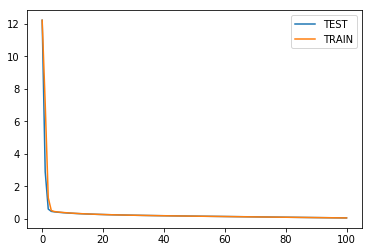

In [11]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(ts, label='TEST')
plt.plot(tr, label='TRAIN')
plt.legend()
plt.show()